<a href="https://colab.research.google.com/github/Murugan03/Final_project/blob/main/customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
# importing all required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [164]:
df = pd.read_csv("/content/train (1).csv") # reading the dataset as pandas dataframe.

In [165]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Data cleaning

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [95]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [96]:
df.shape

(45211, 11)

In [97]:
df.drop_duplicates(inplace = True)

In [98]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [99]:
# outlier detection and correction using iqr method
columns = ['age', 'day', 'dur', 'num_calls' ]
for col in columns:
      iqr = df[col].quantile(.75) - df[col].quantile(.25)
      upper_threshold = df[col].quantile(.75) + (iqr * 1.5)
      lower_threshold = df[col].quantile(.25) - (iqr * 1.5)
      print(col.upper(), " ", upper_threshold, ",", lower_threshold)
      df[col] = df[col].clip(upper_threshold, lower_threshold)

AGE   70.5 , 10.5
DAY   40.5 , -11.5
DUR   643.0 , -221.0
NUM_CALLS   6.0 , -2.0


In [100]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


In [101]:
df.isnull().sum() # checking for null values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [102]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [103]:
columns = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome', 'mon']
for col in columns:
  print(col.upper())
  print(df[col].value_counts(),"\n")

JOB
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

MARITAL
married     27210
single      12788
divorced     5207
Name: marital, dtype: int64 

EDUCATION_QUAL
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64 

CALL_TYPE
cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64 

PREV_OUTCOME
unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64 

MON
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64 



In [104]:
# some columns have unknown values. columns those which have low no.of unknown values replace them with np.nan and the treat them .

df["job"] = df["job"].replace('unknown' , np.nan)
df['education_qual'] = df["education_qual"].replace('unknown', np.nan)

In [105]:
df.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [106]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['education_qual'] = df['education_qual'].fillna(df['education_qual'].mode()[0])

In [107]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# EDA


Feature Distribution

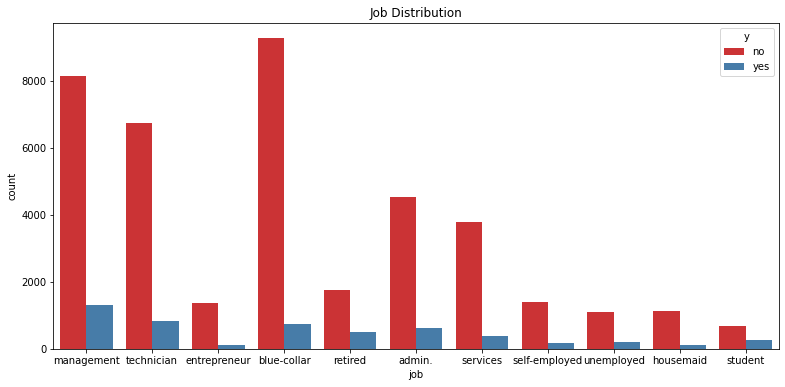

In [108]:
plt.figure(figsize=(13, 6))
sns.countplot(data = df, x = "job",  hue = 'y', palette = 'Set1')
plt.title("Job Distribution")
plt.show()

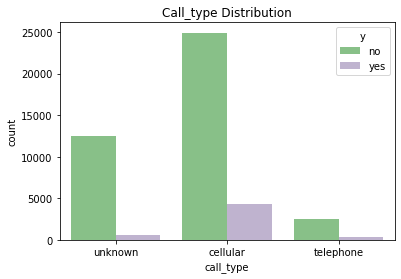

In [109]:
sns.countplot(data = df, x = "call_type",hue = 'y', palette = "Accent")
plt.title("Call_type Distribution")
plt.show()

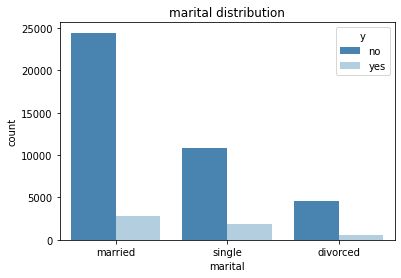

In [110]:
sns.countplot(data = df, x = "marital", hue = "y", palette = "Blues_r")
plt.title("marital distribution")
plt.show()

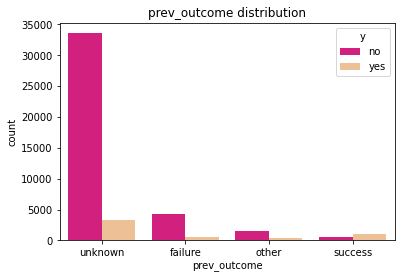

In [111]:
sns.countplot(data = df, x = "prev_outcome", hue = "y", palette = "Accent_r")
plt.title("prev_outcome distribution")
plt.show()

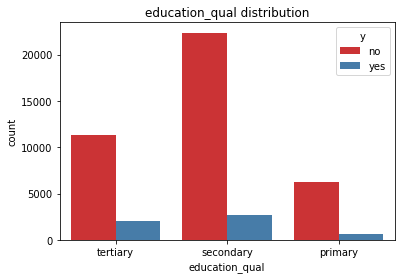

In [112]:
sns.countplot(data = df, x ="education_qual", hue = "y", palette = "Set1")
plt.title("education_qual distribution")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


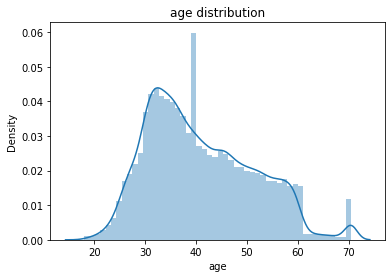

In [113]:
sns.distplot(df['age'])
plt.title("age distribution")
plt.show()


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


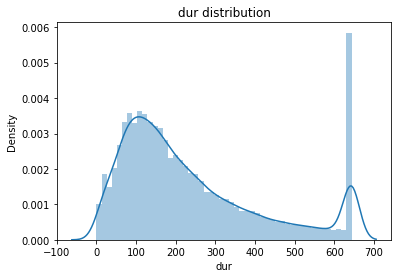

In [114]:
sns.distplot(df['dur'])
plt.title("dur distribution")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


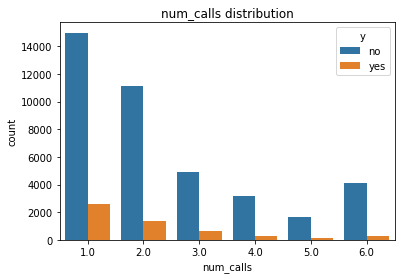

In [115]:
sns.countplot(df['num_calls'], hue = df["y"])
plt.title("num_calls distribution")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


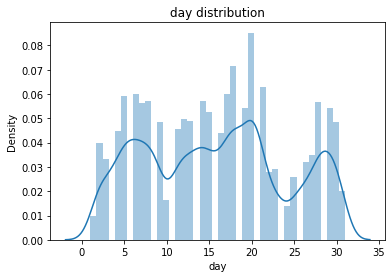

In [116]:
sns.distplot(df["day"])
plt.title("day distribution")
plt.show()

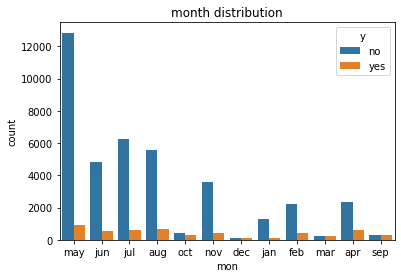

In [117]:
sns.countplot(data = df, x = 'mon', hue =  'y')
plt.title("month distribution")
plt.show()

Feature vs target

In [118]:
df["target"] = df["y"].map({"yes" : 1, "no": 0}) # creating a new column named target .

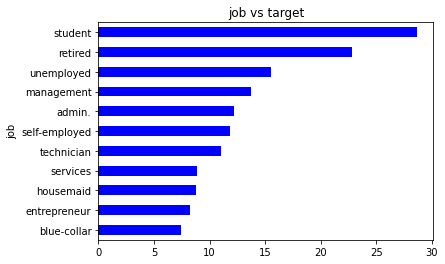

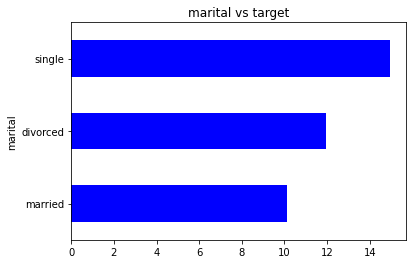

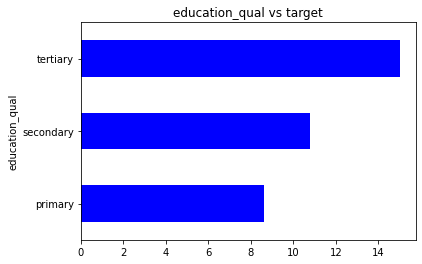

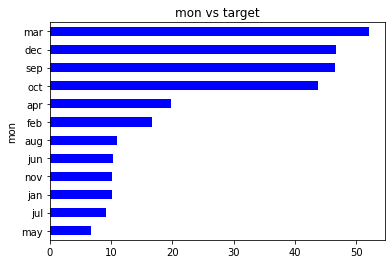

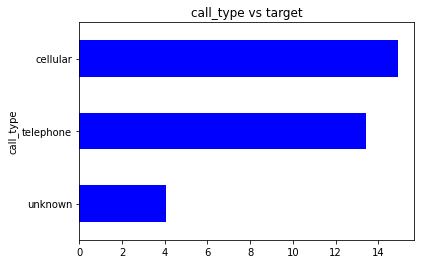

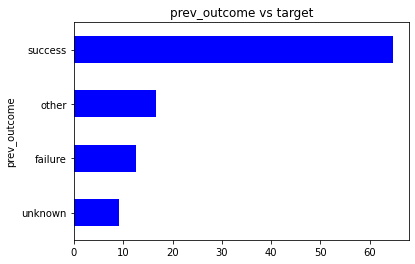

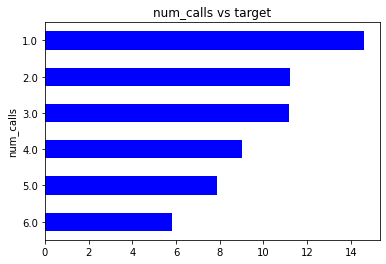

In [119]:
# using for loop the target vs all categorical features plots are plotted.

columns = ['job', 'marital', 'education_qual', 'mon', 'call_type', 'prev_outcome', 'num_calls']
for col in columns:
  (df.groupby(col)["target"].mean() * 100).sort_values().plot(kind = "barh", color = 'b')
  plt.title(col +" " +"vs target")
  plt.show()

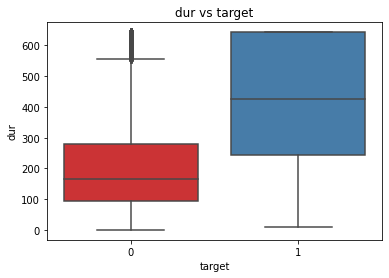

In [120]:
sns.boxplot(data = df, x = 'target', y = 'dur', palette =  "Set1")
plt.title("dur vs target")
plt.show()

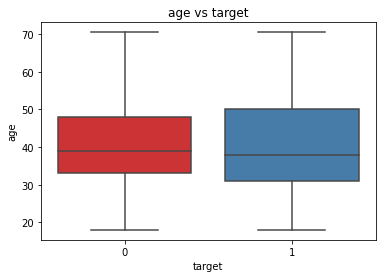

In [121]:
sns.boxplot(data = df, x = 'target', y = 'age', palette =  "Set1")
plt.title("age vs target")
plt.show()

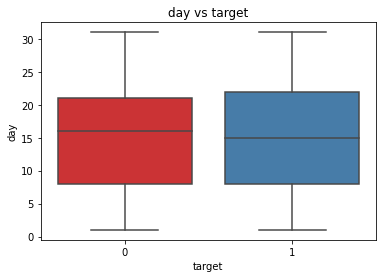

In [122]:
sns.boxplot(data = df, x = 'target', y = 'day', palette =  "Set1")
plt.title("day vs target")
plt.show()

# Encoding


By doing EDA on the given dataset i have noticed that all categorical features have relaionship with the target variable. and the features are ordinal with respect to the target.so i decided to do label encoding for all categorical features.

In [123]:
df['job'] = df['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4,
                           'self-employed':5, 'admin.':6, 'management':7, 'unemployed':8, 'retired':9, 'student':10})

In [124]:
df["marital"] = df['marital'].map({'married': 0, 'divorced':  1, 'single':  2})  

In [125]:
df["education_qual"] = df["education_qual"].map({'primary': 0, 'secondary':1, 'tertiary':2})

In [126]:
df['call_type'] = df['call_type'].map({'unknown': 0, 'telephone': 2, 'cellular': 2})

In [127]:
df['prev_outcome'] = df['prev_outcome'].map({'unknown': 0, 'failure': 1, 'other': 2, 'success':3})

In [128]:
df['mon'] = df['mon'].map({'may': 0, 'jul': 1, 'jan': 2, 'nov':3, 'jun':4, 'aug':5, 'feb':6, 'apr':7, 'oct':8, 'sep':9, 'dec':10, 'mar':11})

In [129]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,7,0,2,0,5,0,261.0,1.0,0,no,0
1,44.0,4,2,1,0,5,0,151.0,1.0,0,no,0
2,33.0,1,0,1,0,5,0,76.0,1.0,0,no,0
3,47.0,0,0,1,0,5,0,92.0,1.0,0,no,0
4,33.0,0,2,1,0,5,0,198.0,1.0,0,no,0


# Splitting the data

In [130]:
# we need to split the data into train and test to build and evaluate the model.
# importing  train_test_split from sklearn
from sklearn.model_selection import train_test_split
# selecting the  feature columns as X
X = df.loc[:,df.columns[:-2]].values
y = df['target'].values # target column as y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [131]:
print(X_train.shape)
print(y_train.shape)

(31643, 10)
(31643,)


# Balancing the data using SMOTEENN

In [132]:
df1 = pd.DataFrame(X_train, columns = df.columns[:-2])
df1['y']=y_train
print(len(df1[df1["y"]==1])/len(df1))
print(len(df1[df1["y"]==0])/len(df1))

0.1156969945959612
0.8843030054040388


I have noticed that the given dataset is imbalanced.where 88% of data belongs to target = "no" and only 11% of data belongs to target = "yes".
so we need to balance the dataset.

In [133]:
# SMOTEENN is used to balance the data
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state = 42)
X_smt, y_smt = smote_enn.fit_resample(X_train, y_train) # only train data should be balalnced.

In [134]:
# After apply balancing technique checking the data to be balanced.
df_bal = pd.DataFrame(X_smt, columns = df.columns[:-2])
df_bal['y']=y_smt
print(len(df_bal[df_bal["y"]==1])/len(df_bal))
print(len(df_bal[df_bal["y"]==0])/len(df_bal))

0.5597844181787914
0.44021558182120857


after balancing the data belongs to one category is 55 and another category is 44 so the data was balanced.

# Scalling the data

In [135]:
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler
# initialize the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smt)
X_test_scaled = scaler.transform(X_test)


In [160]:
X_train_scaled # scaled train data

array([[ 0.51677963,  0.80597275,  0.29857161, ..., -0.78745468,
        -0.15056989, -0.57700955],
       [-0.01171312, -1.61490164, -0.87414025, ..., -0.62907989,
        -0.84047631, -0.57700955],
       [-0.80445226,  1.15181194, -0.87414025, ..., -0.11076238,
         0.53933654, -0.57700955],
       ...,
       [ 1.42256438,  1.30162153,  0.18778493, ..., -0.5292027 ,
         1.03371554, -0.26138159],
       [-0.34787139,  0.61550387,  1.04070742, ...,  0.09168658,
        -0.27722384, -0.57700955],
       [ 0.80527836, -1.61490164, -0.87414025, ...,  1.17848338,
        -0.84047631, -0.1712066 ]])

# Modelling

Logistic Regression


In [137]:
# importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score # importing auroc score
# initialize the model
model = LogisticRegression()
# Train the logistic regression model using train data
model.fit(X_train_scaled, y_smt)
model.score(X_test_scaled, y_test)
y_pred = model.predict_proba(X_test_scaled)
# calculating the auroc score using the est data
lr_roc = roc_auc_score(y_test, y_pred[:,1])
lr_roc

0.8859244373950257

KNN

In [138]:
# importing KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# initialize the model
knn = KNeighborsClassifier()

#  hyper parameter tuning using the GridSearchCV 
param_grid = {'n_neighbors':[1,2,3,4,5,9, 11, 13,25,20,30,50],'weights':['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_smt)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 13, 'weights': 'distance'}
0.9856937941356234


In [139]:
# from hyper parameter tuning i got the best value for n_neighbors is 13 so i build the knn model with n_neighnors = 13
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_smt)

# auroc value for knn
knn_roc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1])
knn_roc

0.8840789576083694

XGboost

In [140]:
import xgboost as xgb
#Define a range of learning rates 
learning_rates = [0.001, 0.01, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8,0.9, 1]

# Train and evaluate an XGBoost classifier for each learning rate
best_accuracy = 0
best_learning_rate = 0
for learning_rate in learning_rates:
    # Train an XGBoost classifier on the training data
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=learning_rate, random_state=42)
    xgb_model.fit(X_train_scaled, y_smt)

    # Predict the classes of the validation data
    y_pred = xgb_model.predict(X_test_scaled)

    # Compute the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy for this learning rate
    print(f"Learning rate: {learning_rate}, Accuracy: {accuracy}")
       # Update the best learning rate if the accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = learning_rate
# Fitting the model using best learning rate
xgb_model = xgb.XGBClassifier(learning_rate = best_learning_rate, random_state=42)
xgb_model.fit(X_train_scaled, y_smt)
# calculating auroc score for this model
xg_roc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])
xg_roc

Learning rate: 0.001, Accuracy: 0.7842501106031559
Learning rate: 0.01, Accuracy: 0.8002507004866539
Learning rate: 0.1, Accuracy: 0.8668338003244359
Learning rate: 0.2, Accuracy: 0.8764194071670846
Learning rate: 0.3, Accuracy: 0.8748709629848105
Learning rate: 0.4, Accuracy: 0.8728063707417785
Learning rate: 0.5, Accuracy: 0.8719215454947647
Learning rate: 0.6, Accuracy: 0.8708892493732487
Learning rate: 0.7, Accuracy: 0.8686034508184634
Learning rate: 0.8, Accuracy: 0.8685297153812123
Learning rate: 0.9, Accuracy: 0.8687509216929656
Learning rate: 1, Accuracy: 0.866317652263678


0.9207993472699355

Decisin **Tree**

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
max_depths = range(1, 21)
scores = {}
for max_depth in max_depths:
  Dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
  Dt_clf.fit(X_train_scaled, y_smt)
  y_pred = Dt_clf.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  scores[max_depth] = accuracy

# Find the maximum accuracy score and the corresponding maximum depth
max_score = max(scores.values())
max_depth = [k for k, v in scores.items() if v == max_score][0]

# Print the maximum depth and the corresponding accuracy score
print("Maximum depth:", max_depth)
print("Accuracy score:", max_score)


Maximum depth: 12
Accuracy score: 0.8495797080076685


In [144]:
# Train the decisiontree classifier using best maximum depth
dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
dt_clf.fit(X_train_scaled, y_smt)
# auroc score
dt_roc = roc_auc_score(y_test, dt_clf.predict_proba(X_test_scaled)[:,1])
dt_roc

0.8352537029007617

**Random** **Forest**

In [145]:
from sklearn.ensemble import RandomForestClassifier

max_depths = [1,2, 3, 5, 7,9,10,20,30,40,50]
# Train and evaluate a random forest classifier for each max_depth value
best_accuracy = 0
best_max_depth = 0
for max_depth in max_depths:
    # Train a random forest classifier on the training data
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf.fit(X_train_scaled, y_smt)

    # Predict the classes of the validation data
    y_pred = rf.predict(X_test_scaled)

    # Compute the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy for this max_depth value
    print(f"Max depth: {max_depth}, Accuracy: {accuracy}")

# Update the best max_depth value if the accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

# Train a random forest classifier on the full training data with the best max_depth value
rf = RandomForestClassifier(n_estimators=100, max_depth=best_max_depth, random_state=42)
rf.fit(X_train_scaled, y_smt)

Max depth: 1, Accuracy: 0.6508627046158384
Max depth: 2, Accuracy: 0.694514083468515
Max depth: 3, Accuracy: 0.7095561126677481
Max depth: 5, Accuracy: 0.7827016664208819
Max depth: 7, Accuracy: 0.8130069311311016
Max depth: 9, Accuracy: 0.8272378705205722
Max depth: 10, Accuracy: 0.8338740598731751
Max depth: 20, Accuracy: 0.862262203214865
Max depth: 30, Accuracy: 0.8639581182716414
Max depth: 40, Accuracy: 0.8639581182716414
Max depth: 50, Accuracy: 0.8639581182716414


RandomForestClassifier(max_depth=30, random_state=42)

In [146]:
# Auroc score for random forest clssifier
rf_roc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1])
rf_roc

0.9131023763376704

In [147]:
auroc_score = pd.DataFrame({"Model":['LR', 'KNN','XGBOOST', 'DT', 'RF'], "AUROC":[lr_roc, knn_roc, xg_roc, dt_roc,rf_roc]})
auroc_score

,Model,AUROC
0,LR,0.885924
1,KNN,0.884079
2,XGBOOST,0.920799
3,DT,0.835254
4,RF,0.913102


From fitting different classificaion models i noticed that out of these models XGBOOST gives the best AUROC score and perform well for this problem.so i consider XGBOOST as the perfect model for this problem.

# Feature Selection

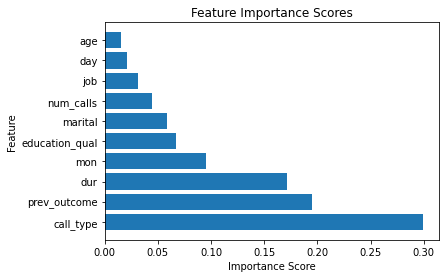

Top 5 important features: ['call_type' 'prev_outcome' 'dur' 'mon' 'education_qual']


In [150]:
# Get the feature importance scores from the trained model
importance_scores = xgb_model.feature_importances_

# Create a dataframe of feature importance scores
importance_df = pd.DataFrame({'feature': df.columns[:-2], 'importance': importance_scores})

# Sort the dataframe by feature importance in descending order
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance scores
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

# Select the top k most important features
k = 5
important_features = importance_df['feature'][:k].values
print(f"Top {k} important features: {important_features}")


From feature selection technique we obtain top 5 important features which are more contribute on the target.

# Model interpretation



1.   XGBOOST is the perfect model for this problem.
2.   The important features are to be focused is ['call_type' 'prev_outcome' 'dur' 'mon' 'education_qual']
3. The conversion percentage on the march month is higer and may month is lower but the company make more calls in the may month and less calls in the march this could be a problem to be solved.
so the company need to make more calls in march and less calls in may.
4. Another important feature is call_type. the chance of conversion is higher when the call_type is cellular.so try to make calls to cellular.


